# When Using the TPU
### Upgrade pip and install catboost, xgboost, lightgbm

In [1]:
!pip install --upgrade pip

!pip install catboost
!pip install xgboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.9 MB/s eta 0:00:00:00:010:01


# Import needed Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, SGDRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor,AdaBoostRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif, RFE

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Read train and test Data

In [3]:
train_set = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test_set = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

# **EDA (Exploratory Data Analsysis)**

### **Check train and test data**
* **Data length**
* **Features**
* **Nulls**
* **Data Type**

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

### **Conclusion of train set**
* **Data length: 1117957**
* **Features: 21 + 1**
* **Nulls: no nulls**
* **Data Type: all numerical**

In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

### **Conclusion of test set**
* **Data length: 745305**
* **Features: 20**
* **Nulls: no nulls**
* **Data Type: all numerical**

### **Check for Uniques in train and test**

In [6]:
uniques = pd.DataFrame(train_set.nunique())
uniques["test"] = pd.DataFrame(test_set.nunique())
uniques = uniques.rename(columns={0:"train_count",
                       "test":"test_count"})
uniques["error"] =  uniques["train_count"]-uniques["test_count"]
uniques

,train_count,test_count,error
id,1117957,745305.0,372652.0
MonsoonIntensity,17,17.0,0.0
TopographyDrainage,19,18.0,1.0
RiverManagement,17,17.0,0.0
Deforestation,18,18.0,0.0
Urbanization,18,18.0,0.0
ClimateChange,18,18.0,0.0
DamsQuality,17,17.0,0.0
Siltation,17,17.0,0.0
AgriculturalPractices,17,17.0,0.0


### **Conclusion**
* **All features are Categorical**
* **Output is between 0 and 1**
* ***TopographyDrainage* and *Encroachments* has one more value in *train* than *test* and that's normal while in *PopulationScore* *test* has one value more than *train* which might be normal in the case of *numerical data* but data is *categorical***

### **Get a Glance at train and test sets**

In [7]:
train_set

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [8]:
test_set

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [9]:
len(train_set)

1117957

### **Set the id column to be the index in train and test rather than dropping**

In [10]:
test_set_id = test_set[["id"]]
train_set = train_set.set_index("id")
test_set = test_set.set_index("id")

### Setting columns to plot 

In [11]:
cat_columns=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 
          'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
          'Siltation', 'AgriculturalPractices', 'Encroachments',
          'IneffectiveDisasterPreparedness', 'DrainageSystems',
          'CoastalVulnerability', 'Landslides', 'Watersheds', 
          'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
           'InadequatePlanning', 'PoliticalFactors']

### **Ploting categorically column to see the distributions of the data and if there's outliers**

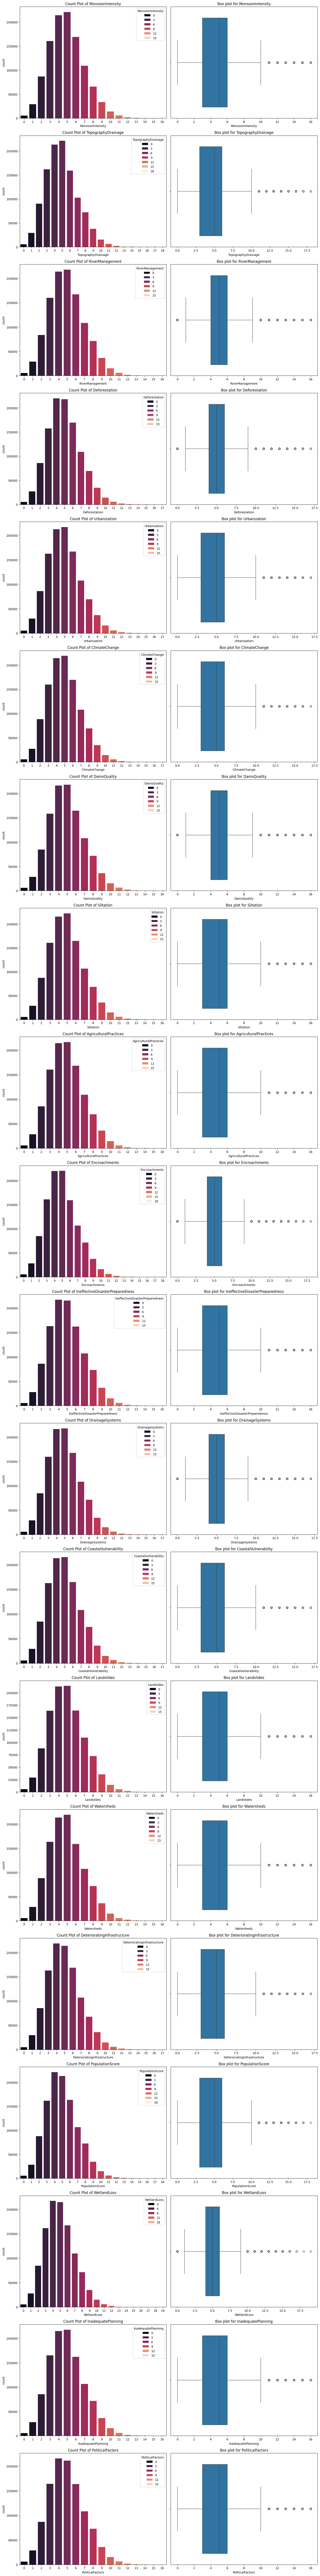

In [12]:
plt.figure(figsize=(15, 120))
countplot_idx = 1
boxplot_idx = 2
for column in cat_columns:
    ax = plt.subplot(20, 2, countplot_idx)
    sns.countplot(x=train_set[column], palette="rocket", hue=train_set[column], dodge=False)
    ax.set_title(f"Count Plot of {column}")
    countplot_idx += 2
    
    plt.subplot(20, 2, boxplot_idx)
    sns.boxplot(x=train_set[column])
    plt.title(f'Box plot for {column}')
    boxplot_idx += 2        

plt.tight_layout()
plt.show()

### **Conclusion**
**Columns seem to be slightly right skewed so we check all columns to make sure**

In [13]:
pd.DataFrame(train_set[cat_columns].skew(), columns= ["skew"])

,skew
MonsoonIntensity,0.444528
TopographyDrainage,0.458728
RiverManagement,0.426491
Deforestation,0.434314
Urbanization,0.442168
ClimateChange,0.429403
DamsQuality,0.441402
Siltation,0.449248
AgriculturalPractices,0.421145
Encroachments,0.463551


### **Conclusion**
**All Columns seem to be in the normally distributed range (-0.5, 0.5)**

### **Then we'll check for duplicates**

In [14]:
train_set.duplicated().value_counts()

False    1117957
Name: count, dtype: int64

### **Conclusion**
**There are no true value which means no duplicated value exists**

### Now we'll see the corr of each column with the target

In [15]:
train_corr_df = pd.DataFrame(train_set.corr()['FloodProbability'].drop('FloodProbability'))

In [16]:
train_corr_df

,FloodProbability
MonsoonIntensity,0.189098
TopographyDrainage,0.187635
RiverManagement,0.187131
Deforestation,0.184001
Urbanization,0.180861
ClimateChange,0.184761
DamsQuality,0.187996
Siltation,0.186789
AgriculturalPractices,0.183366
Encroachments,0.178841


### **Conclusion**
**Correleation seem to be no higher than 0.19 which is pretty bad**

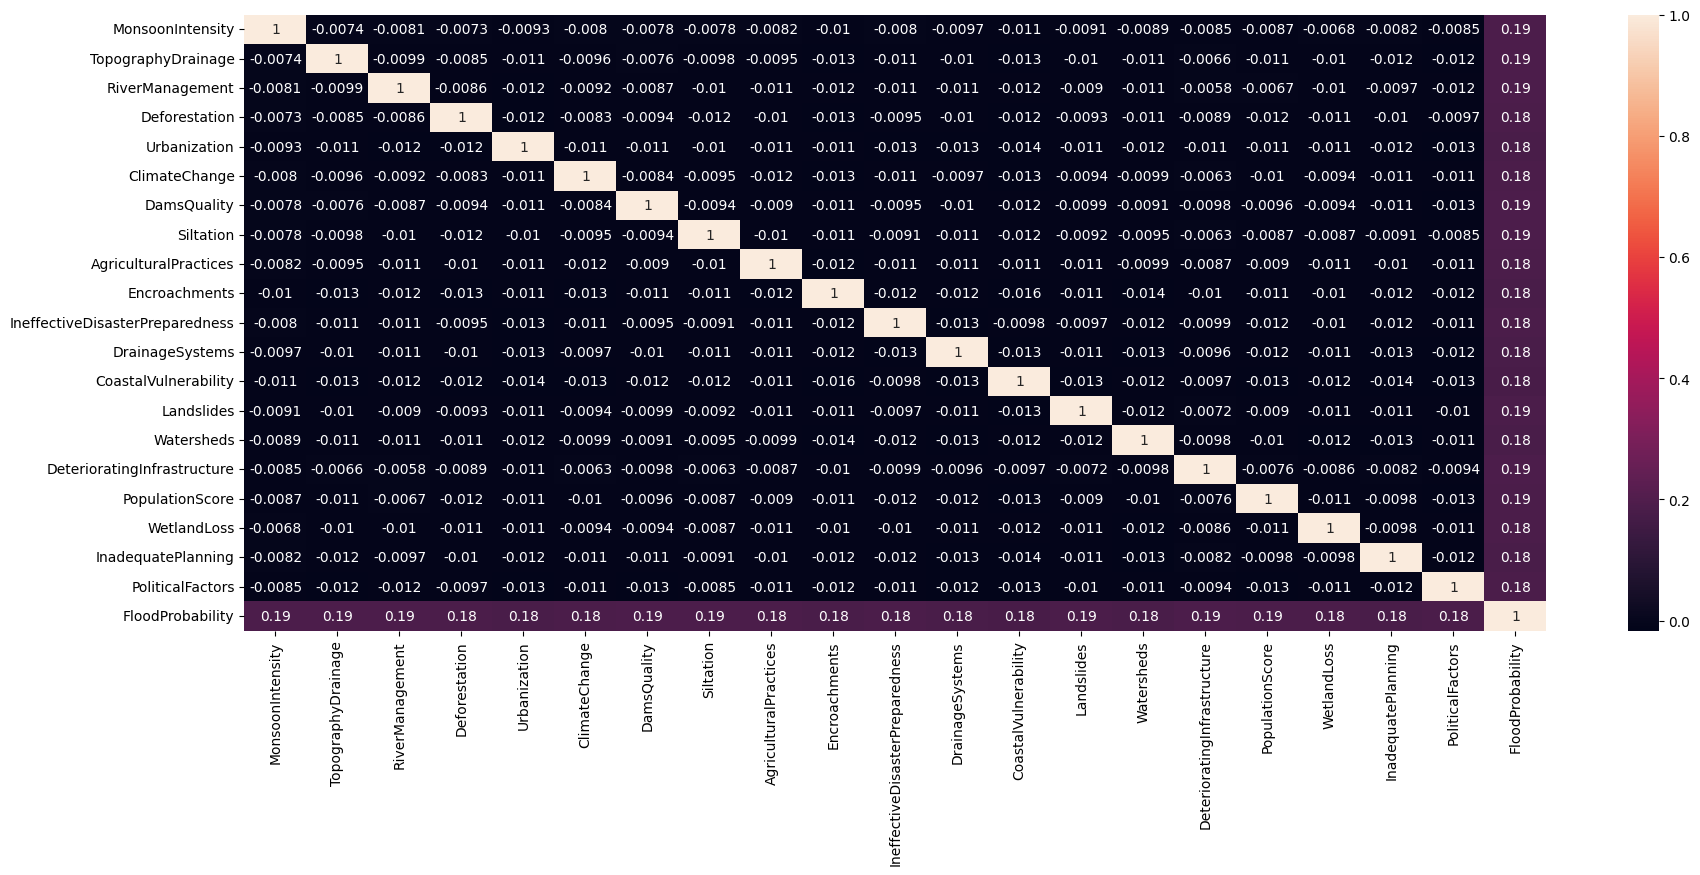

In [17]:
plt.figure(figsize=(21,8))
sns.heatmap(train_set.corr(), annot=True, )
plt.show()

# **Data Proccessing**

### **Splitting the train to features and target**

In [18]:
X = pd.DataFrame(train_set.drop(columns=["FloodProbability"]))
y = pd.DataFrame(train_set["FloodProbability"])

### **To solve the problem of the value that exist in test but not in train (Mainly for DummyEncoding) I'll concat the train (X) and test data to encode to make it easier to work with**

In [19]:
full_df = pd.concat([X, test_set])

### **To make sure the data is concatted right**

In [20]:
full_df.shape

(1863262, 20)

### **Saving columns incase needed at any point**

In [21]:
columns = list(full_df.columns)
columns

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors']

### Feature engineering
**Now it time to fix that bad correlation we saw before with some feature engineering**

### **First after doing some research to find what columns related to others I found the following**
* **Moon Intensity with Climate Change**
* **Topography Drainage with Drainage Systems**
* **Deforestaion with Land Slides**
* **Urbanization with Inadequate Planning**
* **Dams Quality with Siltation**
* **Wet and Loss with Costal Vulnerability**
* **River Managemet with Watersheds**
* **Agricultral Practices with Encroachments**
* **Ineffective Disaster Preparedness with Deteriorating Infrastructure**
* **Population Score with Urbanization**
* **Political Factors with Inadequate Planning**

### **First thing that came to mind was to take the average of the two values**

In [22]:
full_df["Mon-Climate"] = (full_df["MonsoonIntensity"] + full_df["ClimateChange"])/2
full_df["Topo-Drainage"] = (full_df["TopographyDrainage"] + full_df["DrainageSystems"])/2
full_df["Deforest-LandS"] = (full_df["Deforestation"] + full_df["Landslides"])/2
full_df["Urban-Planning"] = (full_df["Urbanization"] + full_df["InadequatePlanning"])/2
full_df["Dams-Siltation"] = (full_df["DamsQuality"] + full_df["Siltation"])/2
full_df["Wetland-CoastVul"] = (full_df["WetlandLoss"] + full_df["CoastalVulnerability"])/2
full_df["RivMan- WaterS"] = (full_df["RiverManagement"] + full_df["Watersheds"])/2
full_df["Agri-Encro"] = (full_df["AgriculturalPractices"] + full_df["Encroachments"])/2
full_df["InefDisPrep-DetInfra"] = (full_df["IneffectiveDisasterPreparedness"] + full_df["DeterioratingInfrastructure"])/2
full_df["PopScore-Urban"] = (full_df["PopulationScore"] + full_df["Urbanization"])/2
full_df["PFactors-Planning"] = (full_df["PoliticalFactors"] + full_df["InadequatePlanning"])/2

### Second thing to take incosideration was
* **Mean**
* **Standard Deviation**
* **Variance**
* **Skewness**
* **Kurtosis Features**
* **Coefficient of variation**
* **Geometric Mean**
* **Harmonic Mean**
* **Double**: The square root of the sum of all the possible double products of the initial features. Rescaled

In [23]:
full_df['mean'] = 0.1 * full_df[columns].mean(axis=1)
full_df['std'] = 0.1 * full_df[columns].std(axis=1)
full_df['var'] = 0.1 * full_df[columns].var(axis=1)
full_df['skew'] = full_df[columns].skew(axis=1)
full_df['kurtosis_features'] = full_df[columns].kurtosis(axis=1)
full_df['cv'] = full_df['std'] / full_df['mean']

In [24]:
full_df['geom_mean'] = 0.1 * np.exp(np.log(full_df[columns]+1).mean(axis=1))
full_df['harm_mean'] = 0.1 * len(columns) / (1 / (full_df[columns]+1)).sum(axis=1)

In [25]:
 full_df['double'] = 0.1 * np.sqrt(np.sum(np.tril(full_df[columns].to_numpy()[:, :, None] * full_df[columns].to_numpy()[:, None, :], k=-1), axis=(1,2)) /380)

### **Dummy encoding**

In [26]:
# full_df_dum = pd.get_dummies(full_df[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 
#                               'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#                               'Siltation', 'AgriculturalPractices', 'Encroachments',
#                               'IneffectiveDisasterPreparedness', 'DrainageSystems',
#                               'CoastalVulnerability', 'Landslides', 'Watersheds', 
#                               'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#                               'InadequatePlanning', 'PoliticalFactors']], columns = columns)
# full_df = full_df.join(full_df_dum)

### **Scaling the non-encoded columns**

In [27]:
# full_df_X_scale  = full_df.loc[:, list(cat_columns)]

In [28]:
scaler = StandardScaler()
full_df[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 
                              'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
                              'Siltation', 'AgriculturalPractices', 'Encroachments',
                              'IneffectiveDisasterPreparedness', 'DrainageSystems',
                              'CoastalVulnerability', 'Landslides', 'Watersheds', 
                              'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
                              'InadequatePlanning', 'PoliticalFactors']] = scaler.fit_transform(full_df[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 
                                                                                                         'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
                                                                                                         'Siltation', 'AgriculturalPractices', 'Encroachments',
                                                                                                         'IneffectiveDisasterPreparedness', 'DrainageSystems',
                                                                                                         'CoastalVulnerability', 'Landslides', 'Watersheds', 
                                                                                                         'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
                                                                                                         'InadequatePlanning', 'PoliticalFactors']])

### **Check On Data**

In [29]:
full_df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,PFactors-Planning,mean,std,var,skew,kurtosis_features,cv,geom_mean,harm_mean,double
id,,,,,,,,,,,,,,,,,,,,,
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,...,5.0,0.470,0.175019,0.306316,0.577258,-0.521862,0.372380,0.545370,0.521955,0.331186
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,...,3.5,0.470,0.229645,0.527368,0.148339,-0.358403,0.488606,0.515494,0.437196,0.330351
2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,0.024110,...,3.0,0.495,0.193241,0.373421,-0.408083,-0.742415,0.390386,0.558789,0.515127,0.348682
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,...,6.0,0.520,0.164157,0.269474,0.120566,-0.590749,0.315686,0.598319,0.575408,0.366778
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,...,4.0,0.360,0.150088,0.225263,0.253227,-0.922261,0.416910,0.435940,0.411361,0.253450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863257,0.039335,-0.443233,1.468530,-0.947235,0.028386,-0.453698,-0.458827,0.034964,0.027194,0.024110,...,6.0,0.470,0.145458,0.211579,-0.328351,1.873119,0.309484,0.548384,0.519588,0.331543
1863258,-0.446964,-0.443233,-1.427222,3.438614,-0.451746,-0.939526,-0.458827,-0.932697,0.027194,0.024110,...,4.5,0.445,0.208945,0.436579,2.674538,9.159246,0.469539,0.518084,0.497687,0.312923
1863259,0.039335,0.989450,1.951156,0.027398,0.028386,0.517958,0.979632,0.034964,0.027194,-0.936185,...,4.5,0.600,0.233959,0.547368,1.041164,0.357118,0.389932,0.666961,0.637813,0.422648


### **Scaling the newly added columns**

In [30]:
scaler = StandardScaler()
full_df[["Mon-Climate", "Topo-Drainage", "Deforest-LandS", "Urban-Planning", 
           "Dams-Siltation", "Wetland-CoastVul", "RivMan- WaterS", "Agri-Encro", 
            "InefDisPrep-DetInfra", "PopScore-Urban", "PFactors-Planning"]] = scaler.fit_transform(full_df[["Mon-Climate", "Topo-Drainage", "Deforest-LandS", "Urban-Planning", 
                                                                                                            "Dams-Siltation", "Wetland-CoastVul", "RivMan- WaterS", "Agri-Encro",
                                                                                                            "InefDisPrep-DetInfra", "PopScore-Urban", "PFactors-Planning"]])

### **Now to redistribute the data**

In [31]:
X = full_df[0:1117957]
test_set = full_df[1117957:]

### **To get correlation of new columns I joined the target with the the features**

In [32]:
for_corr = X.join(y)

### **I put it in a dataframe two see it better**

In [33]:
corr_df_X = pd.DataFrame(for_corr.corr()['FloodProbability'].drop('FloodProbability'))

In [34]:
corr_df_X

,FloodProbability
MonsoonIntensity,0.189098
TopographyDrainage,0.187635
RiverManagement,0.187131
Deforestation,0.184001
Urbanization,0.180861
ClimateChange,0.184761
DamsQuality,0.187996
Siltation,0.186789
AgriculturalPractices,0.183366
Encroachments,0.178841


### **Values seem to be unsorted**

In [35]:
sorted_corr = corr_df_X.sort_values(by='FloodProbability', ascending=False)

In [36]:
sorted_corr

,FloodProbability
double,0.919242
mean,0.919205
geom_mean,0.874324
harm_mean,0.736097
Dams-Siltation,0.266269
Mon-Climate,0.265426
InefDisPrep-DetInfra,0.265127
RivMan- WaterS,0.262441
Deforest-LandS,0.262386
PopScore-Urban,0.260825


In [37]:
corr_more_02 = list(sorted_corr[(sorted_corr > 0.2) | (sorted_corr < -0.2) ].dropna().index)

In [38]:
corr_more_02

['double',
 'mean',
 'geom_mean',
 'harm_mean',
 'Dams-Siltation',
 'Mon-Climate',
 'InefDisPrep-DetInfra',
 'RivMan- WaterS',
 'Deforest-LandS',
 'PopScore-Urban',
 'Topo-Drainage',
 'PFactors-Planning',
 'Agri-Encro',
 'Urban-Planning',
 'Wetland-CoastVul',
 'cv']

### **A little more FEng**
**I added the mean of the highest correlation value**

In [39]:
full_df['mean_highest'] = 0.1 * full_df[corr_more_02].mean(axis=1)

### **Redistribuating the data**

In [40]:
X = full_df[0:1117957]
test_set = full_df[1117957:]

### **Again seeing the correlation this time with a heat map**

In [41]:
for_corr = X.join(y)

In [42]:
corr_df_X = pd.DataFrame(for_corr.corr()['FloodProbability'].drop('FloodProbability'))
sorted_corr = corr_df_X.sort_values(by='FloodProbability', ascending=False)
corr_more_02 = list(sorted_corr[(sorted_corr > 0.2) | (sorted_corr < -0.2)].dropna().index)

### **Make sure we added the new column and see its correleation**

In [43]:
sorted_corr.loc[["mean_highest"]]

,FloodProbability
mean_highest,0.881578


### **Take a look at the new and final correlealtion Heatmap**

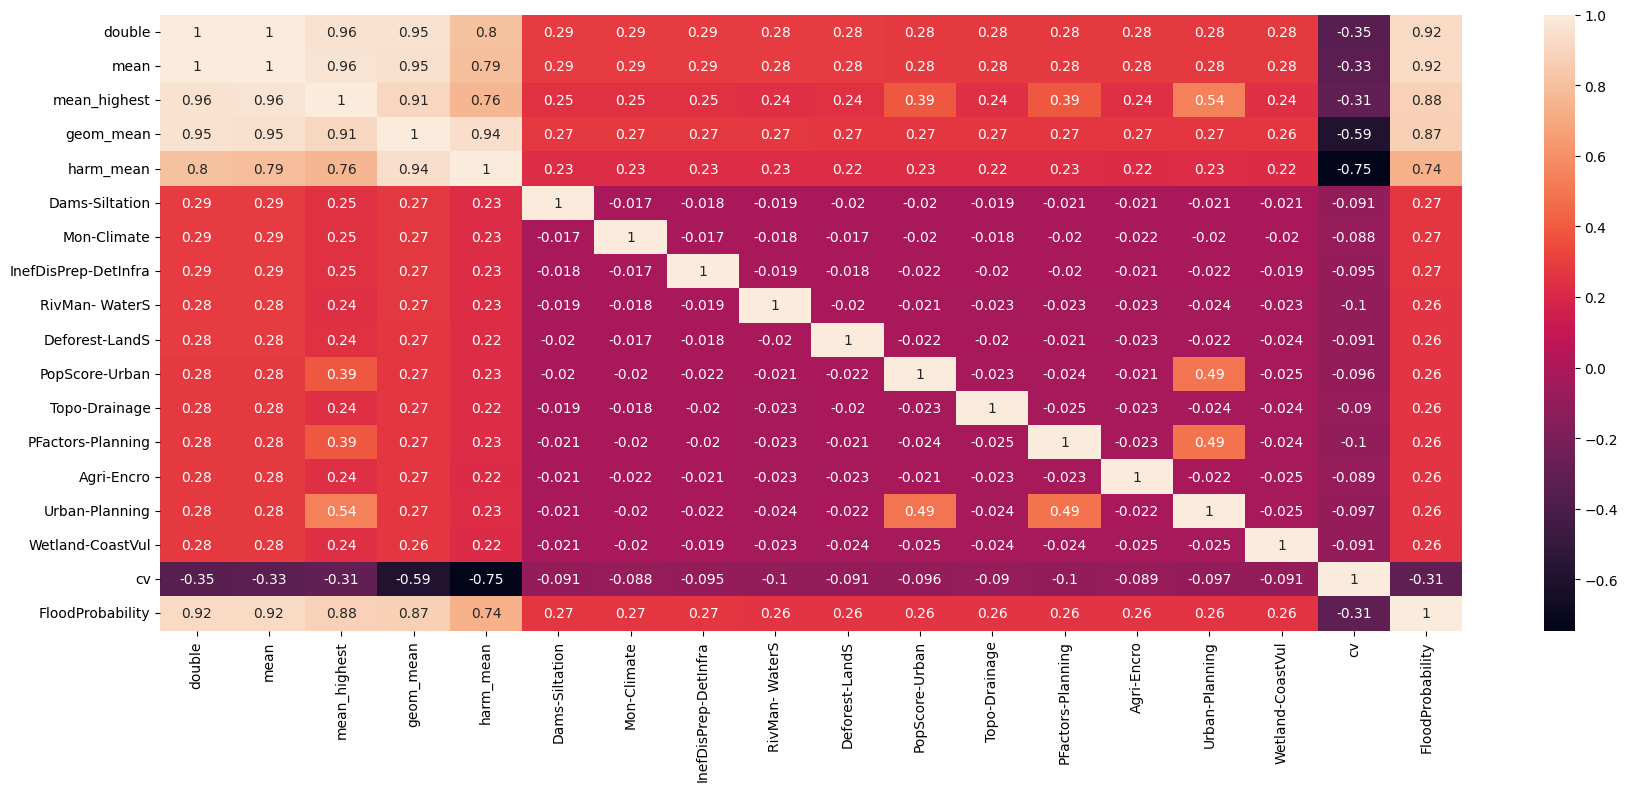

In [44]:
plt.figure(figsize=(21,8))
sns.heatmap(X[corr_more_02].join(y).corr(), annot=True, )
plt.show()

In [45]:
X.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,mean,std,var,skew,kurtosis_features,cv,geom_mean,harm_mean,double,mean_highest
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,1.136009e-03,-6.909155e-04,-9.083067e-04,-7.492284e-04,7.860157e-04,1.106352e-04,-4.968361e-04,2.699929e-05,-5.194634e-04,-2.670590e-04,...,4.939411e-01,2.052674e-01,4.349875e-01,4.039825e-01,1.407483e-01,4.177335e-01,5.571369e-01,5.171361e-01,3.477037e-01,1.458035e-02
std,1.000017e+00,9.999547e-01,1.000090e+00,9.998223e-01,1.000303e+00,9.997088e-01,9.988007e-01,9.995904e-01,9.990610e-01,1.000303e+00,...,4.153644e-02,3.693290e-02,1.598115e-01,4.927096e-01,1.199251e+00,7.833061e-02,4.480560e-02,5.492341e-02,2.943218e-02,2.122519e-02
min,-2.392157e+00,-2.353476e+00,-2.392472e+00,-2.409185e+00,-2.372274e+00,-2.397010e+00,-2.376773e+00,-2.384190e+00,-2.387694e+00,-2.376627e+00,...,3.150000e-01,7.863975e-02,6.184211e-02,-2.060089e+00,-1.916472e+00,1.397117e-01,3.585708e-01,2.565526e-01,2.206450e-01,-7.960971e-02
25%,-9.332621e-01,-9.207935e-01,-4.619709e-01,-4.599185e-01,-9.318782e-01,-9.395261e-01,-4.588273e-01,-9.326975e-01,-9.387612e-01,-4.560372e-01,...,4.700000e-01,1.785173e-01,3.186842e-01,7.254630e-02,-6.436934e-01,3.619469e-01,5.288235e-01,4.843825e-01,3.285134e-01,1.542353e-03
50%,3.933451e-02,3.432829e-02,2.065439e-02,2.739809e-02,2.838565e-02,3.213002e-02,2.065928e-02,3.496413e-02,2.719406e-02,2.411016e-02,...,4.900000e-01,2.013115e-01,4.052632e-01,3.728040e-01,-1.480580e-01,4.119819e-01,5.544360e-01,5.181405e-01,3.448875e-01,1.299563e-02
75%,5.256328e-01,5.118892e-01,5.032797e-01,5.147147e-01,5.085176e-01,5.179581e-01,5.001458e-01,5.187949e-01,5.101717e-01,5.042576e-01,...,5.200000e-01,2.282081e-01,5.207895e-01,6.994590e-01,5.699233e-01,4.674843e-01,5.860832e-01,5.524499e-01,3.667783e-01,2.843406e-02
max,5.388616e+00,6.242620e+00,5.329533e+00,5.875197e+00,5.789969e+00,5.862067e+00,5.295011e+00,5.357103e+00,5.339948e+00,6.266026e+00,...,7.200000e-01,4.183615e-01,1.750263e+00,3.585511e+00,1.438459e+01,9.528351e-01,8.118045e-01,8.036879e-01,5.087653e-01,1.375801e-01


# **Splitting the data for Valdiation**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **Model Valdiation Stage**

### **1) Linear Regression**

In [47]:
linear = LinearRegression()

linear.fit(X_train,y_train)
print(f"Training score {linear.score(X_train,y_train)}")
y_pred = linear.predict(X_test)
print(f"R2: {r2_score(y_test,y_pred)}")
linear_score = r2_score(y_test,y_pred)
linear_Tscore = linear.score(X_train,y_train)
# without dropping
# Training score 0.8457594591756623
# R2: 0.8454697171996348
# after dropping
# Training score 0.8459854314345968
# R2: 0.8446050432676502

# BETTER TRAIN, WORSE TEST

# Training score 0.8449632386720447
# R2: 0.8448671419805959

# Training score 0.8451228724650743
# R2: 0.8450173448266534

# linear complete data
# Training score 0.8488268363920475
# R2: 0.8484823666612045

Training score 0.8458243385363291
R2: 0.8457206423871207


### **2) CatBoost Regressor**

In [48]:
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)
print(f"Training score {cat_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")
CatBoost_score = r2_score(y_test,y_pred)
CatBoost_Tscore = cat_model.score(X_train,y_train)

# without dropping
# Training score 0.849059370869179
# R2: 0.8458341178802313
# after dropping
# Training score 0.8495838425142408
# R2: 0.8450550512464129

# BETTER TRAIN, WORSE TEST

# Training score 0.8511034268861708
# R2: 0.8484659428975101

# Training score 0.8510983395654057
# R2: 0.8482567996850483

# with high corr only
# Training score 0.8689939905594077
# R2: 0.8671051110548669

# Training score 0.8692380657333689
# R2: 0.8673866049021248

# cat complete data
# Training score 0.8712936535722917
# R2: 0.8684364777340219

# Training score 0.8713026887254586
# R2: 0.868381238518181

Learning rate set to 0.119817
0:	learn: 0.0460073	total: 80.1ms	remaining: 1m 20s
1:	learn: 0.0416616	total: 104ms	remaining: 52.1s
2:	learn: 0.0379214	total: 124ms	remaining: 41.3s
3:	learn: 0.0347076	total: 146ms	remaining: 36.3s
4:	learn: 0.0319629	total: 165ms	remaining: 32.8s
5:	learn: 0.0296523	total: 185ms	remaining: 30.7s
6:	learn: 0.0276959	total: 205ms	remaining: 29.1s
7:	learn: 0.0260709	total: 225ms	remaining: 27.9s
8:	learn: 0.0247112	total: 244ms	remaining: 26.8s
9:	learn: 0.0235990	total: 262ms	remaining: 25.9s
10:	learn: 0.0226773	total: 280ms	remaining: 25.2s
11:	learn: 0.0219296	total: 300ms	remaining: 24.7s
12:	learn: 0.0213217	total: 318ms	remaining: 24.2s
13:	learn: 0.0208251	total: 338ms	remaining: 23.8s
14:	learn: 0.0204262	total: 356ms	remaining: 23.4s
15:	learn: 0.0201108	total: 374ms	remaining: 23s
16:	learn: 0.0198544	total: 393ms	remaining: 22.7s
17:	learn: 0.0196477	total: 410ms	remaining: 22.4s
18:	learn: 0.0194820	total: 427ms	remaining: 22s
19:	learn: 0.

### **3) XGBoost Regressor**

In [49]:
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

y_pred = xg_model.predict(X_test)
print(f"Training score {xg_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")
XGBoost_score = r2_score(y_test,y_pred)
XGBoost_Tscore = xg_model.score(X_train,y_train)

# without dropping
# Training score 0.8185763391684946
# R2: 0.8092899007536791
# after dropping
# Training score 0.818278893261753
# R2: 0.8075431863252942

# BETTER TRAIN, WORSE TEST

# Training score 0.8320398257448948
# R2: 0.8265681584631458

# Training score 0.8370201885233045
# R2: 0.8313670522106444

# with high corr only
# Training score 0.8694170389349443
# R2: 0.8668235370658703

# Training score 0.8698661310623312
# R2: 0.8672521384497449

# xg complete data
# Training score 0.8717124360778755
# R2: 0.8681429795144493

Training score 0.8717073461841359
R2: 0.8681890722780921


### **Here I was trying to do a grid search for the best params but no hope (Computing power did not help for the time being)**

In [50]:
# param_grid = {
#     'iterations': [500, 1000],
#     'depth': [4, 6, 10],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'l2_leaf_reg': [1, 3, 5, 7],
# }


# grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best parameters for CatBoostRegressor:")
# print(grid_search.best_params_)

### **4) Support Vector Regressor**

In [51]:
# svc_model = SVR()
# svc_model.fit(X_train, y_train)

# y_pred = svc_model.predict(X_test)

# print(f"Training score {svc_model.score(X_train,y_train)}")
# print(f"R2: {r2_score(y_test,y_pred)}")
# SVR_score = r2_score(y_test,y_pred)
# SVR_Tscore = svc_model.score(X_train,y_train)

# # Training score 0.6892091193403993
# # R2: 0.6879615201044295

### **5) K-nearest Neighbors Regressor**

In [52]:
# knn_model = KNeighborsRegressor()
# knn_model.fit(X_train, y_train)

# y_pred = knn_model.predict(X_test)

# print(f"Training score {knn_model.score(X_train,y_train)}")
# print(f"R2: {r2_score(y_test,y_pred)}")
# KNN_score = r2_score(y_test,y_pred)
# KNN_Tscore = knn_model.score(X_train,y_train)

# # Training score 0.7389672547153135
# # R2: 0.6103305408520886

### **6) Decision Tree Regresor**

In [53]:
# dt_model = DecisionTreeRegressor()
# dt_model.fit(X_train, y_train)

# y_pred = dt_model.predict(X_test)

# print(f"Training score {dt_model.score(X_train,y_train)}")
# print(f"R2: {r2_score(y_test,y_pred)}")
# DT_score = r2_score(y_test,y_pred)
# DT_score = dt_model.score(X_train,y_train)

# # Training score 1.0
# # R2: 0.011373210481789964

### **7) Random Forest Regressor**

In [54]:
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)
# print(f"Training score {rf_model.score(X_train,y_train)}")
# print(f"R2: {r2_score(y_test,y_pred)}")
# RF_score = r2_score(y_test,y_pred)
# RF_Tscore = rf_model.score(X_train,y_train)

# # Training score 0.9473678172793106
# # R2: 0.6280500145463217

### **8) Bagging Regressor**

In [55]:
# bc_model = BaggingRegressor(estimator=rf_model, n_estimators=100)
# bc_model.fit(X_train, y_train)

# y_pred = bc_model.predict(X_test)
# print(f"Training score {bc_model.score(X_train,y_train)}")
# print(f"R2: {r2_score(y_test,y_pred)}")
# BagReg_score = r2_score(y_test,y_pred)
# BagReg_Tscore = bc_model.score(X_train,y_train)

### **9) Extra Tree Regressor**

In [56]:
# ET_model = ExtraTreesRegressor()
# ET_model.fit(X_train, y_train)

# y_pred = ET_model.predict(X_test)
# print(f"Training score {ET_model.score(X_train,y_train)}")
# print(f"R2: {r2_score(y_test,y_pred)}")
# ET_score = r2_score(y_test,y_pred)
# ET_Tscore = ET_model.score(X_train,y_train)

### **10) AdaBoost Regressor**

In [57]:
# ABC_model = AdaBoostRegressor(estimator=bc_model)
# ABC_model.fit(X_train, y_train)

# y_pred = ABC_model.predict(X_test)
# print(f"Training score {ABC_model.score(X_train,y_train)}")
# print(f"R2: {r2_score(y_test,y_pred)}")
# ABC_score = r2_score(y_test,y_pred)
# ABC_Tscore = ABC_model.score(X_train,y_train)

### **Here I'm setting estimators for Voting and Stacking Regressor**

In [58]:
estimators = [("catBoost",cat_model),("linearReg",linear),("xgBoost",xg_model)]

## **11) Voting Regressor**

In [59]:
vc_model = VotingRegressor(estimators)
vc_model.fit(X_train, y_train)

y_pred = vc_model.predict(X_test)
print(f"Training score {vc_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")
VR_score = r2_score(y_test,y_pred)
VR_Tscore = vc_model.score(X_train,y_train)

# without dropping
# Training score 0.8456583210297507
# R2: 0.8417872917459406
# after dropping
# Training score 0.8459156228601873
# R2: 0.8408403700058219

# BETTER TRAIN, WORSE TEST

# Training score 0.8477804436778823
# R2: 0.8451736968761587

# Training score 0.8486829862581831
# R2: 0.8459588292860563

# with high corr only
# Training score 0.8661221100918872
# R2: 0.8645853469530693

# Training score 0.8664405855516222
# R2: 0.8649047721345305

# voting complete data
# Training score 0.8684375143959511
# R2: 0.8661693484135519

/usr/local/lib/python3.10/site-packages/sklearn/ensemble/_voting.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.119817
0:	learn: 0.0460073	total: 21.8ms	remaining: 21.8s
1:	learn: 0.0416616	total: 41.7ms	remaining: 20.8s
2:	learn: 0.0379214	total: 60.3ms	remaining: 20s
3:	learn: 0.0347076	total: 78.6ms	remaining: 19.6s
4:	learn: 0.0319629	total: 96.7ms	remaining: 19.2s
5:	learn: 0.0296523	total: 115ms	remaining: 19.1s
6:	learn: 0.0276959	total: 135ms	remaining: 19.1s
7:	learn: 0.0260709	total: 153ms	remaining: 19s
8:	learn: 0.0247112	total: 173ms	remaining: 19s
9:	learn: 0.0235990	total: 190ms	remaining: 18.8s
10:	learn: 0.0226773	total: 207ms	remaining: 18.7s
11:	learn: 0.0219296	total: 226ms	remaining: 18.6s
12:	learn: 0.0213217	total: 243ms	remaining: 18.5s
13:	learn: 0.0208251	total: 261ms	remaining: 18.4s
14:	learn: 0.0204262	total: 279ms	remaining: 18.3s
15:	learn: 0.0201108	total: 297ms	remaining: 18.3s
16:	learn: 0.0198544	total: 315ms	remaining: 18.2s
17:	learn: 0.0196477	total: 333ms	remaining: 18.2s
18:	learn: 0.0194820	total: 350ms	remaining: 18.1s
19:	learn: 0

### **12) Stacking Regressor**

In [60]:
SC_model = StackingRegressor(estimators)
SC_model.fit(X_train, y_train)

y_pred = SC_model.predict(X_test)
print(f"Training score {SC_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")
StackReg_score = r2_score(y_test,y_pred)
StackReg_Tscore = SC_model.score(X_train,y_train)

# Training score 0.8486827459210073
# R2: 0.8454175629190451
# after dropping
# Training score 0.8488442450516133
# R2: 0.8450995697555888

# BETTER TRAIN, WORSE TEST

# Training score 0.8513106187494396
# R2: 0.8484909488287333

# Training score 0.8508926163373516
# R2: 0.8482738572320817

# with high corr only
# Training score 0.8692084944453877
# R2: 0.8671144372609388

# Training score 0.8695405752611133
# R2: 0.8674593045005337

# complete data
# Training score -0.8129348173408533
# R2: -0.8206480970793406

/usr/local/lib/python3.10/site-packages/sklearn/ensemble/_stacking.py:967: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.119817
0:	learn: 0.0460073	total: 25ms	remaining: 25s
1:	learn: 0.0416616	total: 45.4ms	remaining: 22.6s
2:	learn: 0.0379214	total: 63.8ms	remaining: 21.2s
3:	learn: 0.0347076	total: 82.1ms	remaining: 20.4s
4:	learn: 0.0319629	total: 100ms	remaining: 20s
5:	learn: 0.0296523	total: 121ms	remaining: 20s
6:	learn: 0.0276959	total: 141ms	remaining: 20s
7:	learn: 0.0260709	total: 159ms	remaining: 19.8s
8:	learn: 0.0247112	total: 179ms	remaining: 19.7s
9:	learn: 0.0235990	total: 198ms	remaining: 19.6s
10:	learn: 0.0226773	total: 217ms	remaining: 19.5s
11:	learn: 0.0219296	total: 235ms	remaining: 19.4s
12:	learn: 0.0213217	total: 253ms	remaining: 19.2s
13:	learn: 0.0208251	total: 273ms	remaining: 19.2s
14:	learn: 0.0204262	total: 293ms	remaining: 19.3s
15:	learn: 0.0201108	total: 313ms	remaining: 19.2s
16:	learn: 0.0198544	total: 332ms	remaining: 19.2s
17:	learn: 0.0196477	total: 350ms	remaining: 19.1s
18:	learn: 0.0194820	total: 368ms	remaining: 19s
19:	learn: 0.019350

### **13) LGBM Regressor**

In [61]:
LG_model = LGBMRegressor(boosting_type = 'gbdt', 
                         n_estimators=2000, 
                         learning_rate =  0.012,
                         num_leaves = 250, 
                         subsample_for_bin= 165700, 
                         min_child_samples= 114, 
                         reg_alpha= 2.075e-06, 
                         reg_lambda= 3.839e-07, 
                         colsample_bytree= 0.9634,
                         subsample= 0.9592, 
                         max_depth= 10,
                         random_state=0,
                         verbosity=-1)
LG_model.fit(X_train, y_train)

y_pred = LG_model.predict(X_test)
print(f"Training score {LG_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")
LGReg_score = r2_score(y_test,y_pred)
LGReg_Tscore = LG_model.score(X_train,y_train)

# without dropping
# Training score 0.7722033445629952
# R2: 0.7656664606302841
# after dropping
# Training score 0.7736411682470161
# R2: 0.765641172682489

# BETTER TRAIN, WORSE TEST

# 0.8355890630044472
# R2: 0.8330412134653961

# Training score 0.8179158545212489
# R2: 0.8154329421048914

# with high corr only
# Training score 0.8677071132111231
# R2: 0.8670502864448657

# Training score 0.8680294090677185
# R2: 0.8673631191473345

# LGBM complete data
# Training score 0.8693953938884129
# R2: 0.8684146412104383

# [LightGBM] [Info] Start training from score 0.504480
# Training score 0.8693418511330352
# R2: 0.868388306489848

Training score 0.8769424911108823
R2: 0.8685305273598299


### **Now with a dataframe containg all the final scores from all valdiated on models**

In [62]:
# result = [
#     {"Model": "Linear", "Training score": linear_score , "R2": linear_Tscore},
#     {"Model": "CatBoost", "Training score": CatBoost_score , "R2": CatBoost_Tscore},
#     {"Model": "XGBoost", "Training score": XGBoost_score , "R2": XGBoost_Tscore ,
#     {"Model": "SVR", "Training score": SVR_score, "R2": SVR_Tscore },
#     {"Model": "KNN", "Training score": KNN_score , "R2": KNN_Tscore },
#     {"Model": "Decision Tree", "Training score": DT_score , "R2": DT_Tscore },
#     {"Model": "Random Forest", "Training score": RF_score , "R2": RF_Tscore },
#     {"Model": "Bagging", "Training score": BagReg_score , "R2": BagReg_Tscore },
#     {"Model": "Extra Trees", "Training score": ET_score , "R2": ET_Tscore },
#     {"Model": "AdaBoost", "Training score": ABC_score , "R2": ABC_Tscore },
#     {"Model": "VotingRegressor", "Training score": VR_score , "R2": VR_Tscore },
#     {"Model": "Stacking", "Training score": StackReg_score , "R2": StackReg_Tscore ,
#     {"Model": "LGBMRegressor", "Training score": LGReg_score , "R2": LGReg_Tscore 
# ]

# result_df = pd.DataFrame(result)

In [63]:
# result_df

### **I decided to sort it according to the training score**

In [64]:
# result_df = result_df.sort_values(by='Training score', ascending=False)

# **Final look at the models' scores**

In [65]:
# result_df

### OG Test

In [66]:
# xg_model = XGBRegressor()
# xg_model.fit(X, y)

# y_pred_xg = xg_model.predict(test_set)
# print(f"Training score {xg_model.score(X,y)}")
# # Training score 0.8690384222081213

In [67]:
# SC_model = StackingRegressor(estimators)
# SC_model.fit(X, y)

# y_pred_SC = SC_model.predict(test_set)
# print(f"Training score {SC_model.score(X,y)}")
# # Training score 0.8509888812778332

# # final
# # Training score 0.868946761417187

# # Training score 0.869303107297456

In [68]:
# cat_model = CatBoostRegressor()
# cat_model.fit(X, y)

# y_pred_cat = cat_model.predict(test_set)
# print(f"Training score {cat_model.score(X,y)}")

# # Training score 0.8688006661365003

# # Training score 0.8690503412244763

In [69]:
# y_pred_xg = pd.DataFrame(y_pred_xg)
# output_xg = test_set_id
# output_xg["FloodProbability"] = pd.DataFrame(y_pred_xg)
# output_xg = output_xg.set_index("id")
# output_xg.to_csv("FloodProbability_OHE_project_FEng_xg.csv")

In [70]:
# y_pred_SC = pd.DataFrame(y_pred_SC)
# output_SC = test_set_id
# output_SC["FloodProbability"] = pd.DataFrame(y_pred_SC)
# output_SC = output_SC.set_index("id")
# output_SC.to_csv("FloodProbability_OHE_project_FEng_SC.csv")

In [71]:
# y_pred_cat = pd.DataFrame(y_pred_cat)
# output_cat = test_set_id
# output_cat["FloodProbability"] = pd.DataFrame(y_pred_cat)
# output_cat = output_cat.set_index("id")
# output_cat.to_csv("FloodProbability_OHE_project_FEng_cat_fulldf.csv")

In [72]:
# rf_model = RandomForestRegressor()
# SC_model = StackingRegressor([("rf_model",rf_model)])
# SC_model.fit(X, y)

# y_pred_SC = SC_model.predict(test_set)
# print(f"Training score {SC_model.score(X,y)}")

In [73]:
# y_pred_SC = pd.DataFrame(y_pred_SC)
# output_SC = test_set_id
# output_SC["FloodProbability"] = pd.DataFrame(y_pred_SC)
# output_SC = output_SC.set_index("id")
# output_SC.to_csv("FloodProbability_OHE_project_FEng_SC.csv")

In [74]:
LG_model = LGBMRegressor(boosting_type = 'gbdt', 
                         n_estimators=2000, 
                         learning_rate =  0.012,
                         num_leaves = 250, 
                         subsample_for_bin= 165700, 
                         min_child_samples= 114, 
                         reg_alpha= 2.075e-06, 
                         reg_lambda= 3.839e-07, 
                         colsample_bytree= 0.9634,
                         subsample= 0.9592, 
                         max_depth= 10,
                         random_state=0,
                         verbosity=-1)
LG_model.fit(X, y)

y_pred_LG = LG_model.predict(test_set)
print(f"Training score {LG_model.score(X,y)}")

Training score 0.875477808123235


In [75]:
y_pred_LG = pd.DataFrame(y_pred_LG)
output_LG = test_set_id
output_LG["FloodProbability"] = pd.DataFrame(y_pred_LG)
output_LG = output_LG.set_index("id")
output_LG.to_csv("FloodProbability_SS_project_FEng_LGBM.csv")

/tmp/ipykernel_13/1762924422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_LG["FloodProbability"] = pd.DataFrame(y_pred_LG)
